# Q.어떤 고객이 금융 상품에 가입할까?
- 금융 마켓팅 전략 세우기
- 어떤 고객층을 타겟층으로 잡아야 하나?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


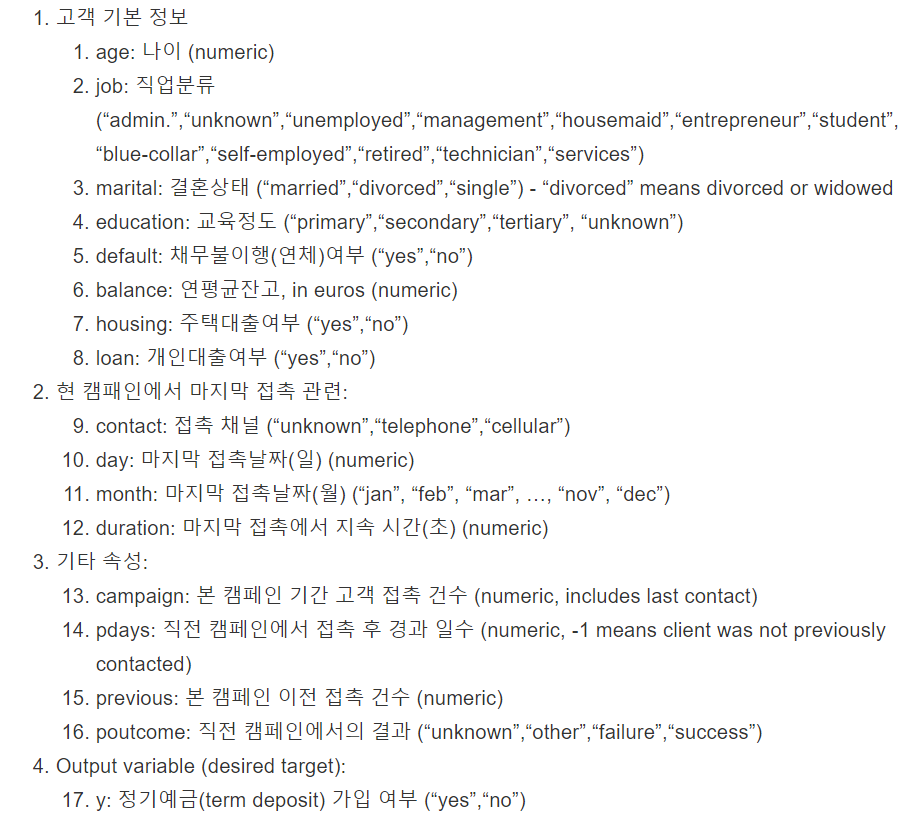

# 1. 데이터 선정 이유 및 문제 정의 (1 DAY)
- 해결하고자 하는 문제가 적용되는 시나리오를 제시
  - 은행의 금융 상품 마켓팅 전략 세우기
  - 가입 가능성이 높은 고객을 선별
- 문제 해결의 필요성에 대해 명확히 제시
  - 고객의 특성이 다양하다. 데이터 분석 없이 금융 상품 개발 시 고객층을 잡을 수 없다. 고객의 특성에 맞는 맞춤형 금융 상품을 개발하기 위해
- 데이터셋 선정이 끝났다면 어떤 유형의 문제로 (분류 / 회귀) 접근할지도 결정
  - 타겟 변수 : 해당 특성을 가지고 있는 고객의 정기예금(term deposit) 가입 여부 (“yes”,“no”)
  - 분류 문제
- 데이터셋에서 해결하고자 하는 문제 정의에 적절한 타겟을 선정
- 타겟을 잘 설명할 수 있을 만한 특성에 대한 가설을 설정
  - 직업이 있고(학생 제외), 기혼, 대출을 받은 30~50대의 고객이 정기예금에 많이 가입할 것이다.
- **태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.**
  - 내가 세운 가설이 문제 해결에 의미가 있나요?
  - 해당 특성을 target으로 지정한 이유를 설명하세요

In [167]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [168]:
# 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
warnings.filterwarnings('ignore')
%matplotlib inline

In [169]:
# 나눔폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# matplotlib font 설정

plt.rc('font', family = 'NanumGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [170]:
# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/bank.csv")

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# 2. 데이터 전처리, EDA, 시각화(1.5 DAY)
- 머신러닝에 적합한 형태로 데이터 타입을 변경
- 여러 테크닉을 사용해 결측치를 적절히 처리
- 본인의 전처리 과정에 대해 근거를 들어 설명
- 피쳐의 분포를 확인하고 이상치를 적절히 제거
- 1에서 세운 가설과 관련한 시각화 결과를 제시
- **태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다**
  - Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?
  - 특성과 타겟의 관계 및 가설을 충분히 설명할 수 있는 시각화 결과를 제시했나요?

In [172]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [174]:
# 결측치 확인
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [175]:
# 타겟값 yes/no -> 1/0 변환
df['deposit'] = df['deposit'].apply(lambda x: 1 if x=='yes' else 0)

In [176]:
# 타겟 분포 확인
df['deposit'].value_counts(normalize=True)

0    0.52616
1    0.47384
Name: deposit, dtype: float64

- 0과 1의 비율이 비슷 -> 불균형 클래스가 아니다.

In [177]:
# AGE 피처에서 높은 카디널리티
len(df.age.unique())

76

In [178]:
df.age.unique()

array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89])

In [179]:
# 나이를 범주형 변수로 변환
df['age_bin'] = 0
df.loc[df['age'] <= 20, 'age_bin'] = 0
df.loc[(df['age'] > 20) & (df['age'] <= 30), 'age_bin'] = 1
df.loc[(df['age'] > 30) & (df['age'] <= 40), 'age_bin'] = 2
df.loc[(df['age'] > 40) & (df['age'] <= 50), 'age_bin'] = 3
df.loc[(df['age'] > 50) & (df['age'] <= 60), 'age_bin'] = 4
df.loc[(df['age'] > 60) & (df['age'] <= 70), 'age_bin'] = 5
df.loc[(df['age'] > 70) & (df['age'] <= 80), 'age_bin'] = 6
df.loc[(df['age'] > 80) & (df['age'] <= 90), 'age_bin'] = 7
df.loc[df['age'] > 90, 'age_bin'] = 8

In [180]:
df.drop(columns='age', inplace=True)

### 시각화

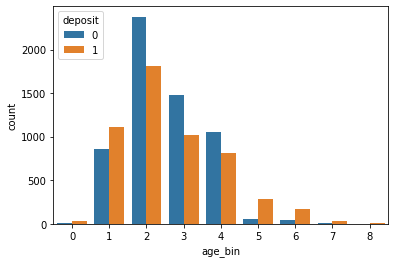

In [181]:
# 연령별 타겟값 분포 확인
%matplotlib inline
sns.countplot(x='age_bin', hue='deposit', data=df)

- 20~50대는 정기예금을 가입하지 않은 사람이 더 많다.
- 60~90대는 정기예금을 가입한 사람이 더 많다. (데이터 희소)

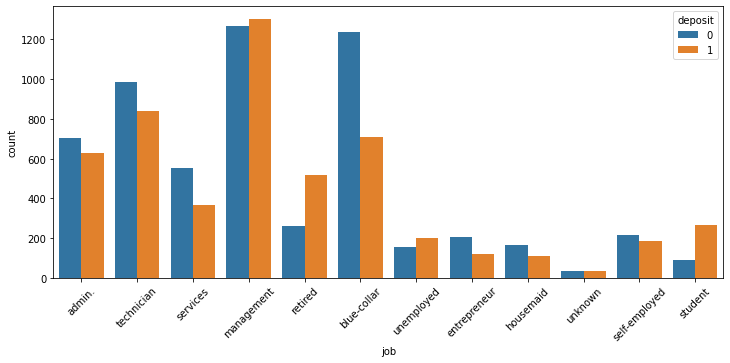

In [182]:
# 직업별 타겟값 분포 확인
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)

sns.countplot(x='job', hue='deposit', data=df)

- management 직종의 가입률이 가장 높다.
- blue-collar 직종의 경우 가입하지 않은 고객의 수가 가입한 고객의 수보다 대략 두배가량 높다.
- retired의 경우 가입하지 않은 고객보다 가입한 고객의 수가 두배가량 높다.

In [183]:
# 타겟값이 1일때의 job 분포
df[df['deposit']==1].job.value_counts()

management       1301
technician        840
blue-collar       708
admin.            631
retired           516
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: job, dtype: int64

- management의 비율이 가장 높음 -> 가입한 사람 중 management가 가장 많다.

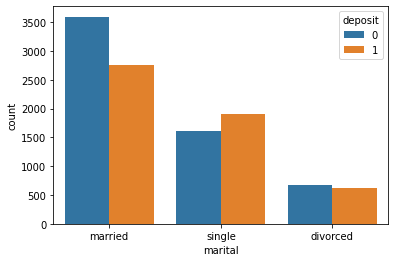

In [184]:
# 미/기혼별 타겟값 분포 확인

sns.countplot(x='marital', hue='deposit', data=df)

- 미혼의 정기예금 가입 수가 기혼/이혼에 비해 높음

Text(0.5, 1.0, '주택 대출 여부별 deposit 가입 여부')

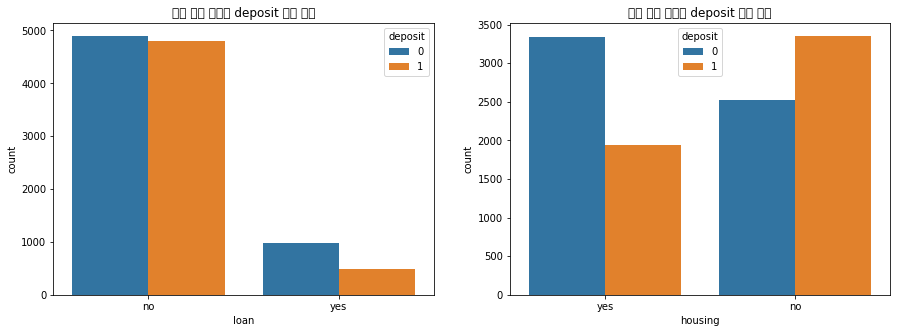

In [185]:
# 대출여부에 따른 타겟값 분포 확인
f, ax = plt.subplots(1, 2, figsize=(15,5))
plt.rc('font', family='NanumGothic')
sns.countplot(x='loan', hue='deposit', data=df, ax=ax[0])
ax[0].set_title('개인 대출 여부별 deposit 가입 여부')

sns.countplot(x='housing', hue='deposit', data=df, ax=ax[1])
ax[1].set_title('주택 대출 여부별 deposit 가입 여부')

- 대출을 받지 않은 사람의 정기 예금 가입 수가 많다.

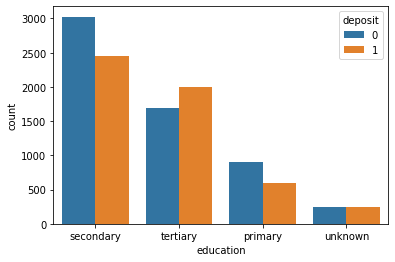

In [186]:
# 교육 정도별 타겟값 분포 확인
sns.countplot(x='education', hue='deposit', data=df)

- tertiary 수준의 가입률이 높다

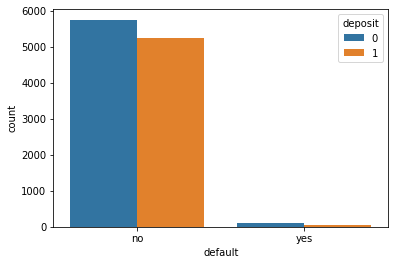

In [187]:
# default 여부에 따른 타겟값 분포 확인
sns.countplot(x='default', hue='deposit', data=df)

- default 여부에 따른 가입률은 차이가 없다고 볼 수 있다. 유의미한 관계가 도출되지 않음

In [188]:
# 가입 유무별 자산 평균
df.groupby('deposit')['balance'].mean()

deposit
0    1280.227141
1    1804.267915
Name: balance, dtype: float64

- 가입을 하지 않은 그룹과 가입을 한 그룹의 평균은 큰 차이가 없다.

- **종합**
  - 20~50대
  - management 직종
  - 미혼
  - 주택 대출x
  - tertiary 수준
의 정기예금 가입률이 높다.

# 3. 모델링 및 모델 해석(1 DAY)
- baseline 모델을 선정하고 이에 기반해 모델링 성능을 평가
- 반복적인 Feature Engineering 과정을 통해 모델 성능을 최적화
- 문제 정의에 맞는 평가 지표를 선택하여 모델의 성능을 설명
- 교차검증이나 hold-out 기법을 사용해 학습 성능과 일반화 성능을 구분하여 제시
- 여러 수치적 지표 및 permutation importance, pdp, shap 등을 활용하여 최종모델을 설명
- 1에서 제시한 가설을 해결
- **태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.**
  - 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
  - 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
  - 최종 모델과 일반화 성능에 관해 설명
  - 모델이 관측치를 예측하기 위해서 어떤 특성을 활용

In [189]:
# 데이터 split (train/test)
from sklearn.model_selection import train_test_split

target = 'deposit'
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.85, random_state=2, shuffle=True)


In [190]:
# 데이터 split (train/val)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.8, random_state=2, shuffle=True)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (7589, 16)
y_train shape (7589,)
X_val shape (1898, 16)
y_val shape (1898,)
X_test shape (1675, 16)
y_test shape (1675,)


In [191]:
# baseline 모델 설정_단순한 로지스틱회귀 모델

pipe = make_pipeline(
    OneHotEncoder(),  
    LogisticRegression(random_state=42)
)

pipe.fit(X_train, y_train)

print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.7892518440463646


- 기준 모델의 경우, 검증 데이터셋의 정확도는 약 78.9% 정도로 다소 높은 정확도
- 클래스 데이터가 비교적 균형하기 때문에 평가지표로 'Accuracy' 사용

### 1. 랜덤포레스트

In [192]:
# randomizedsearchcv
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pipe = make_pipeline(
    TargetEncoder(),
    RandomForestClassifier(random_state=2)
)

dists = {
    'targetencoder__smoothing': [100.,500.,1000.],
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, 25, None], 
    'randomforestclassifier__max_features': uniform(0, 1),
    'randomforestclassifier__criterion': ['gini', 'entropy']
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy',  
    verbose=1,
    random_state=42
)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('targetencoder', TargetEncoder()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=2))]),
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                              15,
                                                                              20,
                                                                              25,
                                                                              None],
                                        'randomforestclassifier

In [193]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('Accuracy: ', clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 25, 'randomforestclassifier__max_features': 0.6011150117432088, 'randomforestclassifier__n_estimators': 201, 'targetencoder__smoothing': 1000.0}
Accuracy:  0.8561066802848352


### 2. XGBoost

In [196]:
from xgboost import XGBClassifier

pipe = make_pipeline(
    TargetEncoder(),
    XGBClassifier(random_state=2, n_jobs=-1))

dists = {
    'targetencoder__smoothing': [100.,500.,1000.],
    'xgbclassifier__learning_rate' : [0.10,0.15,0.20,0.25,0.30], 
    'xgbclassifier__max_depth': [5, 10, 15, 20, None],
    'xgbclassifier__n_estimators' : [100, 500, 1000]
    }

clf1 = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy',  
    verbose=1,
)

clf1.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('targetencoder', TargetEncoder()),
                                             ('xgbclassifier',
                                              XGBClassifier(n_jobs=-1,
                                                            random_state=2))]),
                   param_distributions={'targetencoder__smoothing': [100.0,
                                                                     500.0,
                                                                     1000.0],
                                        'xgbclassifier__learning_rate': [0.1,
                                                                         0.15,
                                                                         0.2,
                                                                         0.25,
                                                                         0.3],
                                        'xgbclassifier__m

In [197]:
print('최적 하이퍼파라미터: ', clf1.best_params_)
print('Accuracy: ', clf1.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.1, 'targetencoder__smoothing': 100.0}
Accuracy:  0.857029641229005


- 검증 정확도
  - RandomForest : 0.856
  - XGBoost : 0.857
- **Accuracy 값이 더 높은 XGBoost 모델 선택!**

### 모델의 피처 중요도 계산

In [ ]:
!pip install eli5

In [198]:
import eli5
from sklearn.pipeline import Pipeline
from eli5.sklearn import PermutationImportance

pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(smoothing=100.0), StandardScaler())),
    ('XGB', XGBClassifier(n_estimators=1000, random_state=2, n_jobs=-1, learning_rate=0.1, max_depth =  10)) 
])
pipe.fit(X_train, y_train)

permuter = PermutationImportance(
    pipe.named_steps['XGB'], 
    scoring='accuracy', 
    n_iter=5, 
    random_state=2
)

X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

permuter.fit(X_val_transformed, y_val)

eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=X_val.columns.tolist() 
)

Weight,Feature
0.2115 ± 0.0082,duration
0.0768 ± 0.0094,month
0.0273 ± 0.0100,day
0.0259 ± 0.0074,contact
0.0118 ± 0.0045,poutcome
0.0071 ± 0.0035,housing
0.0050 ± 0.0044,age_bin
0.0036 ± 0.0084,balance
0.0033 ± 0.0045,pdays
0.0019 ± 0.0020,loan


- **duration** (마지막 contact에서 지속 시간) 피처의 영향도가 가장 높다.

### 일반화 성능

In [200]:
# 일반화 성능 평가
print('테스트셋 정확도: ', clf1.score(X_test, y_test))

테스트셋 정확도:  0.8519402985074627


**- 최종 모델의 일반화 성능 : 0.8519**

### 여러 수치적 지표 및 permutation importance, pdp, shap 등을 활용하여 최종모델을 설명

#### PDP plot

In [ ]:
!pip install shap
!pip install pdpbox

In [208]:
encoder = TargetEncoder(smoothing =100.0)
X_train_encoded = encoder.fit_transform(X_train, y_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터
X_test_encoded = encoder.transform(X_test)

boosting = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    n_jobs=-1,
    max_depth =  10,
    random_state=2
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train)

XGBClassifier(max_depth=10, n_estimators=1000, n_jobs=-1, random_state=2)

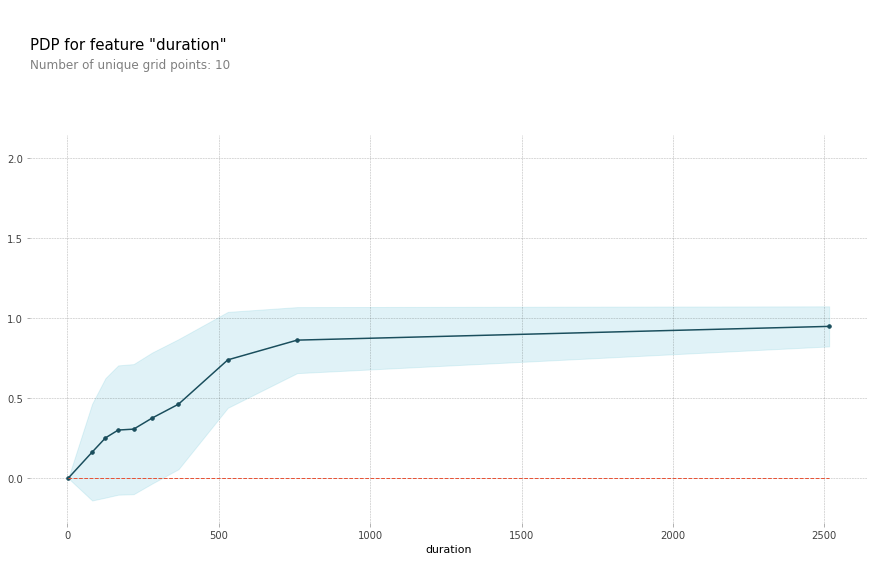

In [211]:
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'duration'
pdp_dist = pdp.pdp_isolate(model=boosting, dataset=X_test_encoded, model_features = X_test_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fac4ef5c410>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fac4ef06210>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fac4eebc890>}})

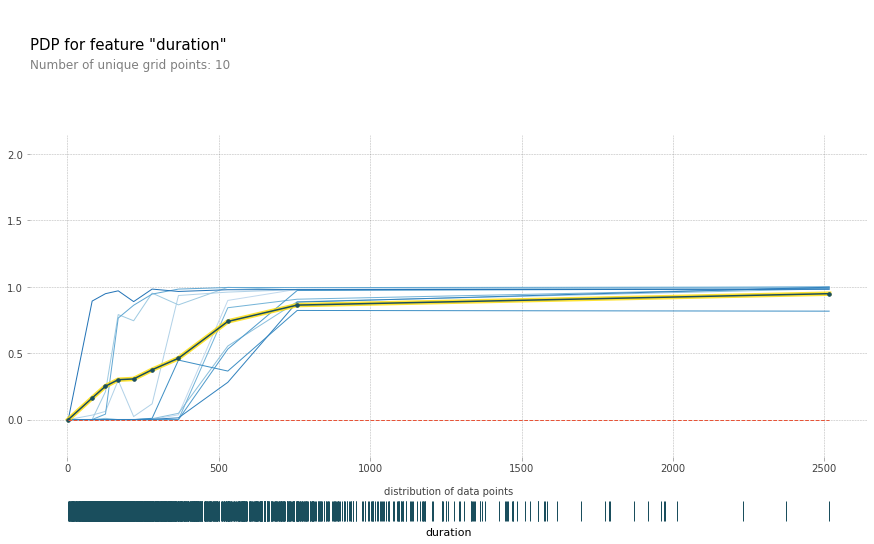

In [216]:
# 10개의 ICE curves
pdp.pdp_plot(pdp_dist
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=10
         , plot_pts_dist=True) 

#### SHAP

In [228]:
import shap
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144
import warnings
warnings.filterwarnings('ignore')

explainer = shap.TreeExplainer(boosting)
shap_values = explainer.shap_values(X_test_encoded.iloc[:100])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_encoded.iloc[:100])

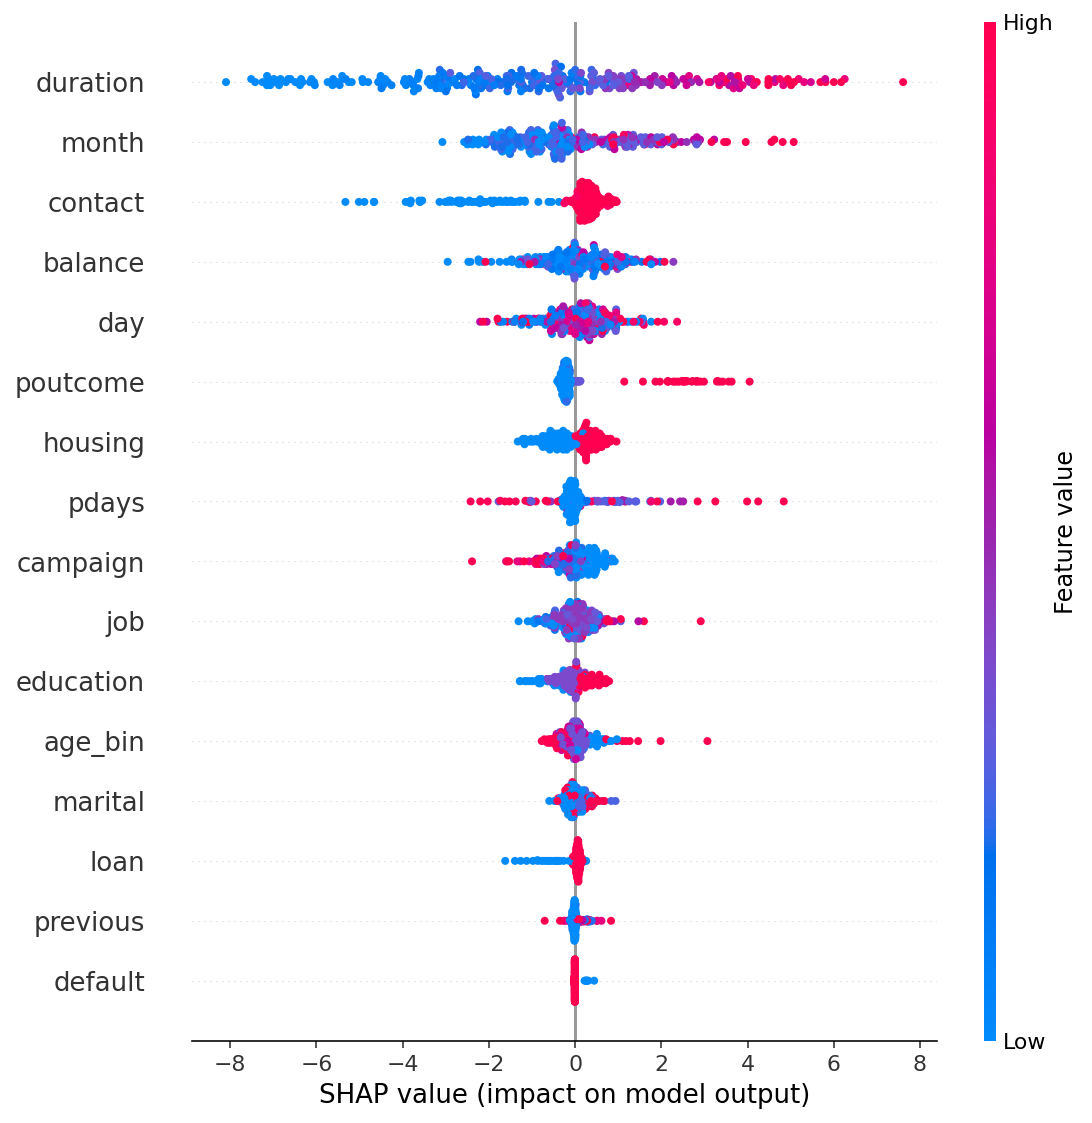

In [229]:
shap_values = explainer.shap_values(X_test_encoded.iloc[:300])
shap.summary_plot(shap_values, X_test_encoded.iloc[:300])